### Import the necessary libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Read and inspect data

In [3]:
import os

In [4]:
os.getcwd() # Check the current working directory
os.chdir('C:\\Users\\test2\\Desktop\\My_Freelancing\\Training\\Data Wrangling and EDA') # Change the working directory

In [5]:
titanic_data = pd.read_csv('titanic.csv') # Read the data

In [6]:
titanic_data.head() # Look at the top 5 records

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
titanic_data.shape # rows and columns (891, 12)

(891, 12)

In [8]:
titanic_data.columns # Get the list of columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [9]:
titanic_data.dtypes # Get the datatype of the columns

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [10]:
titanic_data.PassengerId = titanic_data.PassengerId.astype('str')
titanic_data.Survived = titanic_data.Survived.astype('str')
titanic_data.Pclass = titanic_data.Pclass.astype('str')

In [11]:
titanic_data.dtypes

PassengerId     object
Survived        object
Pclass          object
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

### Descriptive analysis of data

In [12]:
# Get the description of numeric variables
titanic_data.describe()

,Age,SibSp,Parch,Fare
count,714.000000,891.000000,891.000000,891.000000
mean,29.699118,0.523008,0.381594,32.204208
std,14.526497,1.102743,0.806057,49.693429
min,0.420000,0.000000,0.000000,0.000000
25%,20.125000,0.000000,0.000000,7.910400
50%,28.000000,0.000000,0.000000,14.454200
75%,38.000000,1.000000,0.000000,31.000000
max,80.000000,8.000000,6.000000,512.329200


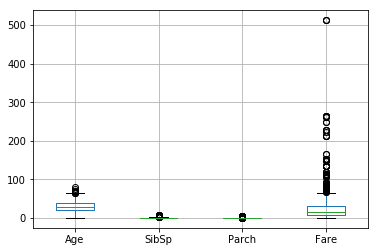

In [13]:
titanic_data.boxplot()

In [14]:
# Look at the categorical variables
print(titanic_data.Survived.value_counts())
print('='*20)
print(titanic_data.Sex.value_counts())

0    549
1    342
Name: Survived, dtype: int64
male      577
female    314
Name: Sex, dtype: int64


### Missing value analysis

In [15]:
# Find the columns with missing values
titanic_data.isnull().sum()/ titanic_data.shape[0]*100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

##### Numeric features

In [16]:
titanic_data.Age.isnull().sum() # Number of missing values in Age

177

In [17]:
# Replace the missing values in Age with average age of passengers
titanic_data.Age.fillna((titanic_data.Age.mean()), inplace = True)

In [18]:
titanic_data.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age            False
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

##### Categorical features

In [19]:
titanic_data.Embarked.isnull().sum()

2

In [20]:
titanic_data[titanic_data.Embarked.isna()] # Get the records where Embarked is missing

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [21]:
titanic_data.Embarked.value_counts() # Get the frequency distribution of Embraked across its classes

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [22]:
titanic_data.Embarked.fillna('S', inplace= True)

In [23]:
titanic_data[titanic_data.Embarked.isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


##### variables with lots of missing values

In [24]:
titanic_data.Cabin.isnull().sum() # 687 records have missing Cabin values
titanic_data.Cabin.isnull().sum()/ titanic_data.Cabin.shape[0]*100 # 77% values are missing

77.10437710437711

In [25]:
# As 77% of values are missing for Cabin variable, it is recommended to drop this variable
titanic_data = titanic_data.drop(labels='Cabin', axis=1)

In [26]:
titanic_data.shape

(891, 11)

In [27]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


### Outlier Analysis

##### Using IQR

In [28]:
q1 = titanic_data.Age.quantile(0.25)
q3 = titanic_data.Age.quantile(0.75)
iqr = q3-q1

In [29]:
lower_limit = q1-(1.5*iqr)
upper_limit = q3+(1.5*iqr)

In [30]:
titanic_data[(titanic_data.Age<lower_limit) | (titanic_data.Age>upper_limit)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.00,3,1,349909,21.0750,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.00,0,0,113783,26.5500,S
15,16,1,2,"Hewlett, Mrs. (Mary D Kingcome)",female,55.00,0,0,248706,16.0000,S
16,17,0,3,"Rice, Master. Eugene",male,2.00,4,1,382652,29.1250,Q
33,34,0,2,"Wheadon, Mr. Edward H",male,66.00,0,0,C.A. 24579,10.5000,S
...,...,...,...,...,...,...,...,...,...,...,...
827,828,1,2,"Mallet, Master. Andre",male,1.00,0,2,S.C./PARIS 2079,37.0042,C
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.00,0,0,113572,80.0000,S
831,832,1,2,"Richards, Master. George Sibley",male,0.83,1,1,29106,18.7500,S
851,852,0,3,"Svensson, Mr. Johan",male,74.00,0,0,347060,7.7750,S


In [31]:
titanic_data[(titanic_data.Age<lower_limit) | (titanic_data.Age>upper_limit)].sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
205,206,0,3,"Strom, Miss. Telma Matilda",female,2.00,0,1,347054,10.4625,S
647,648,1,1,"Simonius-Blumer, Col. Oberst Alfons",male,56.00,0,0,13213,35.5000,C
803,804,1,3,"Thomas, Master. Assad Alexander",male,0.42,0,1,2625,8.5167,C
94,95,0,3,"Coxon, Mr. Daniel",male,59.00,0,0,364500,7.2500,S
116,117,0,3,"Connors, Mr. Patrick",male,70.50,0,0,370369,7.7500,Q
555,556,0,1,"Wright, Mr. George",male,62.00,0,0,113807,26.5500,S
16,17,0,3,"Rice, Master. Eugene",male,2.00,4,1,382652,29.1250,Q
831,832,1,2,"Richards, Master. George Sibley",male,0.83,1,1,29106,18.7500,S
164,165,0,3,"Panula, Master. Eino Viljami",male,1.00,4,1,3101295,39.6875,S
183,184,1,2,"Becker, Master. Richard F",male,1.00,2,1,230136,39.0000,S


##### Using boxplot and histogram

In [32]:
# To generate the graphs inside the notebook
%matplotlib inline 

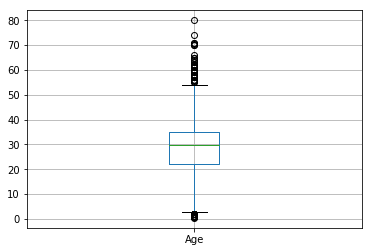

In [33]:
titanic_data.boxplot(column='Age')
plt.show()

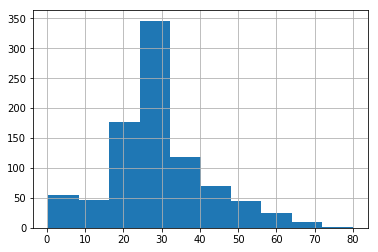

In [34]:
titanic_data.Age.hist()
plt.show()

### Variable Transformation

In [35]:
from scipy.stats import skew, kurtosis

In [36]:
titanic_data.dtypes

PassengerId     object
Survived        object
Pclass          object
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Embarked        object
dtype: object

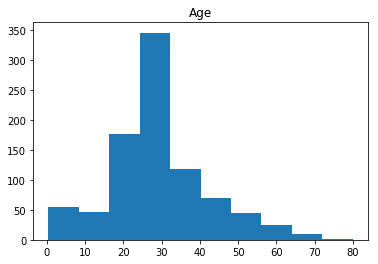

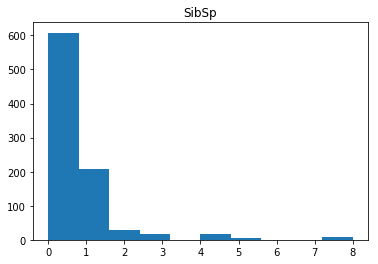

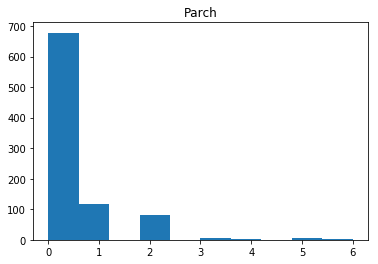

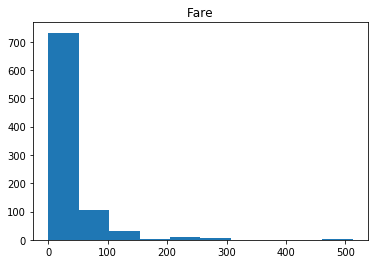

In [37]:
for col in titanic_data.describe().columns:
    plt.hist(titanic_data[col])
    plt.title(col)
    plt.show()

In [38]:
# Check the Skewness and Kurtosis for Fare
skew(titanic_data.Fare) #4.77
kurtosis(titanic_data.Fare) #33.20

33.20428925264474

In [62]:
# Shapiro Wilk's Test- suitable for smaller samples of data (less than 1000 observations)
from scipy.stats import shapiro
stat, p = shapiro(titanic_data.Fare)
print('Statisitics=%.3f, p-value=%.3f' %(stat,p)) # p-value < 0.05 implies abnormality

Statisitics=0.522, p-value=0.000


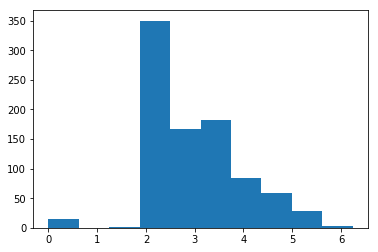

In [39]:
# As the distribution of Fare is right skewed, log transformation may help
plt.hist(np.log(titanic_data.Fare+1))
plt.show()

In [40]:
# Check the Skewness and Kurtosis for log of Fare
skew(np.log(titanic_data.Fare+1)) #0.39
kurtosis(np.log(titanic_data.Fare+1)) #0.96

0.9639464598718401

In [41]:
# Add the transformed variable in the titanic dataset. It may help in developing a better model
titanic_data['Fare_Log'] = np.log(titanic_data.Fare+1)

In [42]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Fare_Log
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,2.110213
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,4.280593
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,2.188856
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,3.990834
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,2.202765


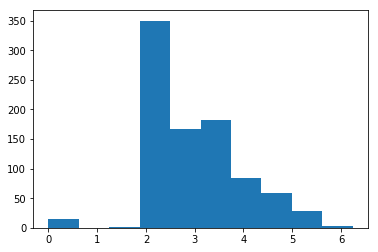

In [64]:
# Box-cox transformation [(x^lambda -1)/ lambda]
# from scipy.stats import boxcox
# Fare_boxcox = boxcox(titanic_data.Fare+1,0)
# plt.hist(Fare_boxcox)
# plt.show()

### Feature Engineering

In [43]:
# If age is less than 10 then call the passenger a Child
def male_female_child(passenger):
    age, sex = passenger
    if age<10:
        return 'child'
    else:
        return sex

In [44]:
# Add a new feature to the dataset Passenger_Type
titanic_data['Passenger_Type'] = titanic_data[['Age','Sex']].apply(male_female_child, axis=1)

In [45]:
titanic_data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Fare_Log,Passenger_Type
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S,2.110213,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C,4.280593,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S,2.188856,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S,3.990834,female
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S,2.202765,male
5,6,0,3,"Moran, Mr. James",male,29.699118,0,0,330877,8.4583,Q,2.246893,male
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,17463,51.8625,S,3.967694,male
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,349909,21.0750,S,3.094446,child
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,0,2,347742,11.1333,S,2.495954,female
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,237736,30.0708,C,3.436268,female


### Univariate and Multivariate Analysis

In [46]:
titanic_data.Age.describe() # Median age of passenger is 30 years

count    891.000000
mean      29.699118
std       13.002015
min        0.420000
25%       22.000000
50%       29.699118
75%       35.000000
max       80.000000
Name: Age, dtype: float64

Text(0, 0.5, 'Frequency')

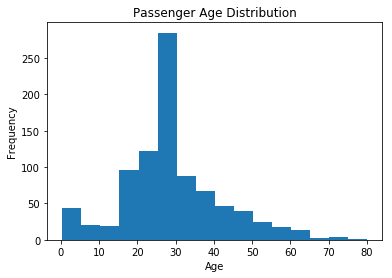

In [47]:
plt.hist(titanic_data.Age, bins=16)
plt.title('Passenger Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')

In [48]:
survived_df = pd.DataFrame(titanic_data.Survived.value_counts().reset_index())

In [49]:
survived_df.columns = ['Survived', 'Count']
survived_df

,Survived,Count
0,0,549
1,1,342


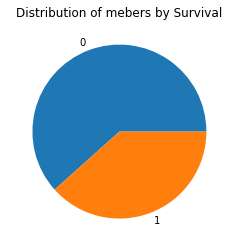

In [50]:
plt.pie(survived_df.Count, labels=survived_df.Survived)
plt.title('Distribution of mebers by Survival')
plt.show()

In [51]:
titanic_data.corr() # Correlation plot of all the numeric variables

,Age,SibSp,Parch,Fare,Fare_Log
Age,1.000000,-0.232625,-0.179191,0.091566,0.102485
SibSp,-0.232625,1.000000,0.414838,0.159651,0.318528
Parch,-0.179191,0.414838,1.000000,0.216225,0.332186
Fare,0.091566,0.159651,0.216225,1.000000,0.787543
Fare_Log,0.102485,0.318528,0.332186,0.787543,1.000000


,Survived,Age,SibSp,Parch,Fare,Fare_Log
Survived,1.000000,-0.069809,-0.035322,0.081629,0.257307,0.329862
Age,-0.069809,1.000000,-0.232625,-0.179191,0.091566,0.102485
SibSp,-0.035322,-0.232625,1.000000,0.414838,0.159651,0.318528
Parch,0.081629,-0.179191,0.414838,1.000000,0.216225,0.332186
Fare,0.257307,0.091566,0.159651,0.216225,1.000000,0.787543
Fare_Log,0.329862,0.102485,0.318528,0.332186,0.787543,1.000000


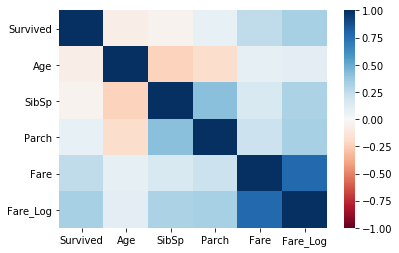

In [52]:
# Heatmap of the numeric features and target variable
tmp = titanic_data.copy()
tmp['Survived'] = tmp['Survived'].astype('int')
display(tmp.corr())

import seaborn as sns
sns.heatmap(tmp.corr(),vmin=-1, vmax=1, cmap='RdBu')

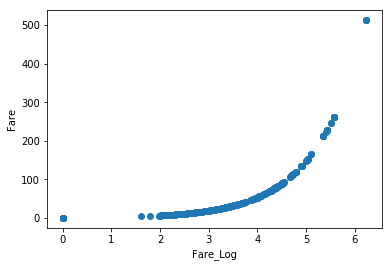

In [57]:
# Scatterplot between numeric variables
plt.scatter(titanic_data.Fare_Log, titanic_data.Fare)
plt.xlabel('Fare_Log')
plt.ylabel('Fare')
plt.show()

In [58]:
# Cross tab of two categorical variables 
psg_type_survives = pd.crosstab(titanic_data.Passenger_Type, titanic_data.Survived, normalize='index')
psg_type_survives

Survived,0,1
Passenger_Type,,
child,0.387097,0.612903
female,0.246479,0.753521
male,0.834862,0.165138
